In [38]:
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt

In [39]:
from PIL import Image

In [40]:
from torch.utils.data import Dataset, DataLoader, TensorDataset

In [41]:
import torch

In [42]:
Path.ls = lambda x: [i for i in x.iterdir()]

In [43]:
PATH = Path("/home/shaun/personal/acdc_challenge/data")

In [44]:
images_path = PATH/"images"

In [45]:
labels_path = PATH/"labels"

In [ ]:
b = list(labels_path.iterdir())

In [ ]:
labels_path[0]

In [ ]:
images_path[0].name

In [101]:
def show_image(img, label=False):
    if not label:
        plt.imshow((img.mean(dim=0)*255).numpy())
    else:
        plt.imshow(lbl.numpy())
    

In [57]:
class HeartDataSet(Dataset):
    def __init__(self, images_path, labels_path, size=256):
        self.images_list = list(images_path.iterdir())
        self.labels_list = list(labels_path.iterdir())
        self.size = (size, size)
        
    def resize(self, arr):
        return np.array(Image.fromarray(arr).resize(self.size)) # bilinerar resizing
    
    def get_pair(self, image_path):
        label_path =  [file for file in self.labels_list if str(image_path.name) in str(file)]
        assert len(label_path) == 1 # make sure there only one label per image
        label = torch.tensor(self.resize(np.load(label_path[0])))
                             
        image = torch.tensor((self.resize(np.load(image_path))/255)[None], dtype=torch.float)
        return image, label
    
    def __len__(self):
        return len(self.images_list)
    
    def __getitem__(self, idx):
        image_path = self.images_list[idx]
        image, label = self.get_pair(image_path)
        return image, label
    
        

In [116]:
ds = HeartDataSet(images_path, labels_path)

In [117]:
img, lbl = ds[101]
img.shape

torch.Size([1, 256, 256])

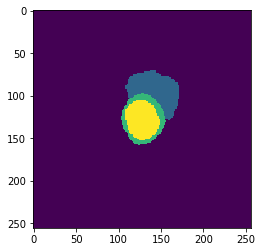

In [118]:
show_image(lbl, label=True)

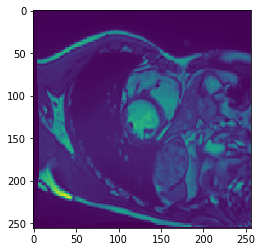

In [119]:
show_image(img)

In [52]:
show_image(img)

NameError: name 'show_image' is not defined

In [53]:
img.shape

torch.Size([1, 216, 256])

In [54]:
lbl.shape

torch.Size([216, 256])

In [ ]:
loader = DataLoader(ds, batch_size=6)

In [ ]:
batch = next(iter(loader))